# Exploring Footballer Birth Dates Through Data Science

## Intro

Using football data found here:

<https://www.kaggle.com/datasets/hugomathien/soccer>

It's a topic I have am interest in and some basic 'layman' knowledge so I will be able to provide some basic domain knowledge and should be able to spot any glaring errors

I'll be doing some some exploratory data analysis - EDA

I would like to check if players born earlier in a football season are likely to do better -- there is something similar that happens for children at school

>_"being the youngest in the school-entry cohort has an impact on self-confidence, notably on self-perceived competence and self-efficacy, and also on future education outcomes." (Pauline Givord, 2020)_

Does the same hold true for footballers. If so then there should be fewer professional footballers with a birth date towards the end of a football season.

### Playing with Python 

Part of this Notebook's function is also a chance for me to play with Python again.

It is something that is not called upon everyday in my current role and so has grown a little rusty. I still remember what I need to do, but I don't necessarly remember the exact syntax.

Also I intend to have the markdown cells record my thought process as I'm going along - a proper neater write up will be elsewhere :-)

## Set up  
first thing's first is to import some libraries

In [4]:
#!pip install ydata-profiling

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# This ensures graphs appear in the notebook properly.
%matplotlib inline

# for making visualising the data easier
import seaborn as sns

# to quickly provide a detailed report about the data
# use ydata profiling - this has replaced pandas profiling
# !pip install ydata-profiling
from ydata_profiling import ProfileReport

## Import the data and initial exploration

Next I need to load in the data.

I've already downloaded and extracted the 'players_22.csv' file from the zip file found at Kaggle.

I've gone with 2022 as it's the most recent, and presumably comprehensive, list in the data, and I only want one year as I'm not tracking footballers through time.

In [7]:
# because I'm lazy I have the dataset in the same directory as this notebook

df = pd.read_csv('players_22.csv', low_memory=False)

# use .shape to return the total number of records and total number of columns
df.shape

(19239, 110)

110 columns is far too many for the purposes of the analytics I plan to carry out

Let's see what they're all named and pick out those of interest...

In [9]:
# Get a list of all column names
column_names = df.columns.tolist()
print("All columns:", column_names)

All columns: ['sofifa_id', 'player_url', 'short_name', 'long_name', 'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob', 'height_cm', 'weight_kg', 'club_team_id', 'club_name', 'league_name', 'league_level', 'club_position', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nationality_id', 'nationality_name', 'nation_team_id', 'nation_position', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_bal

### Columns to keep:

'sofifa_id', 
'long_name', 
'overall', 
'age', 
'dob', 
'club_name', 
'league_name', 
'league_level', 
'nationality_name',

might want to keep
'player_positions',
'club_position',

So let's look at those

In [11]:
# get a list of unique values in a column 
df['player_positions'].unique()

array(['RW, ST, CF', 'ST', 'ST, LW', 'LW, CAM', 'CM, CAM', 'GK',
       'CDM, CM', 'CF, ST', 'LM, CF, LW', 'CDM', 'CB', 'LW', 'RW',
       'CDM, RB', 'CM', 'LW, RW', 'CAM', 'RW, LW', 'CAM, RM, RW',
       'CM, LM', 'CB, CDM', 'CM, CDM', 'CF, CAM', 'LB', 'CM, CDM, CB',
       'RB', 'RM, CF, LM', 'LB, LM', 'LW, CF', 'RW, RM', 'ST, RM, RW',
       'CDM, CB', 'RB, LB', 'LM, RM, LW', 'CAM, CM, RW', 'CM, RM, ST',
       'CAM, CF, CM', 'CAM, CM', 'CAM, CF', 'ST, LW, LM', 'ST, LW, RW',
       'CF', 'CF, LW, CAM', 'RM, LM, RW', 'CM, CDM, CAM', 'LM, ST',
       'RB, RWB', 'RB, RM', 'CF, ST, CAM', 'RB, RWB, RM', 'ST, RW',
       'CB, LB', 'CAM, CM, CF', 'LW, CF, CAM', 'LW, LM, CAM', 'LM, LWB',
       'RW, CAM', 'CAM, RM, ST', 'RM, LM', 'CAM, LW, CM', 'RW, LW, CAM',
       'CB, RWB', 'CM, CAM, CDM', 'CAM, RM, LM', 'CM, CDM, LM',
       'CF, RM, RW', 'ST, CF', 'LWB, LB, LM', 'LB, LWB, LM', 'LM, CM, RM',
       'ST, RM', 'ST, CAM', 'LWB, LM', 'LB, CB', 'CAM, RM', 'RW, LW, RM',
       'RM, RW', 'CAM,

There are a lot there, far more than I was hoping for and, though expected, each player can have many different positions.

I will drop these.

Let's see if the same is true of the club_position

In [13]:
df['club_position'].unique()

array(['RW', 'ST', 'LW', 'RCM', 'GK', 'CF', 'CDM', 'LCB', 'RDM', 'RS',
       'LCM', 'SUB', 'CAM', 'RCB', 'LDM', 'LB', 'RB', 'LM', 'RM', 'LS',
       'CB', 'RES', nan, 'RWB', 'RF', 'CM', 'LWB', 'LAM', 'LF', 'RAM'],
      dtype=object)

this looks more manageable, so will keep these and not the 'player_positions' column

In [15]:
columns_to_keep = ['sofifa_id', 
                   'long_name', 
                   'overall', 
                   'age', 
                   'dob', 
                   'club_name', 
                   'league_name', 
                   'league_level', 
                   'nationality_name',
                   'club_position']

df = df.get(columns_to_keep)

# we'll also set the sofifa_id as the index for good data management
df.set_index('sofifa_id', inplace =True)

# check it
df.tail(10)

long_name  overall  age         dob  \
sofifa_id                                                      
259737                Haobam Singh       47   18  2003-02-17   
260398         Nathan-Dylan Saliba       47   17  2004-02-07   
261547                  Revanth By       47   22  1998-11-17   
261667             Matthew O'Brien       47   18  2003-01-24   
261818             Ronan Gallagher       47   20  2001-05-11   
261962                         宋德福       47   22  1999-01-02   
262040             Caoimhin Porter       47   19  2002-03-18   
262760     Nathan Logue-Cunningham       47   21  2000-02-07   
262820                 Luke Rudden       47   19  2002-04-23   
264540     Emanuel Lalchhanchhuaha       47   19  2002-02-06   

                       club_name                     league_name  \
sofifa_id                                                          
259737         SC East Bengal FC             Indian Super League   
260398     Club de Foot Montréal         USA Major League Soccer   
261547             Chennaiyin FC             Indian Super League   
261667             Longford Town  Rep. Ireland Airtricity League   
261818                Finn Harps  Rep. Ireland Airtricity League   
261962                  Wuhan FC            Chinese Super League   
262040                Derry City  Rep. Ireland Airtricity League   
262760                Finn Harps  Rep. Ireland Airtricity League   
262820                Finn Harps  Rep. Ireland Airtricity League   
264540       NorthEast United FC             Indian Super League   

           league_level     nationality_name club_position  
sofifa_id                                                   
259737              1.0                India           RES  
260398              1.0               Canada           RES  
261547              1.0                India           RES  
261667              1.0  Republic of Ireland           RES  
261818              1.0  Republic of Ireland           RES  
261962              1.0             China PR           SUB  
262040              1.0  Republic of Ireland           RES  
262760              1.0  Republic of Ireland           RES  
262820              1.0  Republic of Ireland           RES  
264540              1.0                India           SUB

Looking again, more closely, at those values in 'club_position' Sub and Res, for substitute and reserve respectively, aren't the useful categorisations I was hoping for. So will also drop that column 

In [17]:
# Drop unwanted columns (keep everything else)

df = df.drop(columns='club_position')

# check it
df.columns

Index(['long_name', 'overall', 'age', 'dob', 'club_name', 'league_name',
       'league_level', 'nationality_name'],
      dtype='object')

In [18]:
# use the describe function to see what some of the basic number fields hold
# Get descriptive statistics for all columns (numeric and non-numeric) by using include='all'
df.describe(include='all').round(0)

long_name  overall      age         dob            club_name  \
count             19239  19239.0  19239.0       19239                19178   
unique            19219      NaN      NaN        6312                  701   
top     Ladislav Krejčí      NaN      NaN  1992-02-29  Paris Saint-Germain   
freq                  2      NaN      NaN         125                   33   
mean                NaN     66.0     25.0         NaN                  NaN   
std                 NaN      7.0      5.0         NaN                  NaN   
min                 NaN     47.0     16.0         NaN                  NaN   
25%                 NaN     61.0     21.0         NaN                  NaN   
50%                 NaN     66.0     25.0         NaN                  NaN   
75%                 NaN     70.0     29.0         NaN                  NaN   
max                 NaN     93.0     54.0         NaN                  NaN   

                    league_name  league_level nationality_name  
count                     19178       19178.0            19239  
unique                       55           NaN              163  
top     USA Major League Soccer           NaN          England  
freq                        771           NaN             1719  
mean                        NaN           1.0              NaN  
std                         NaN           1.0              NaN  
min                         NaN           1.0              NaN  
25%                         NaN           1.0              NaN  
50%                         NaN           1.0              NaN  
75%                         NaN           1.0              NaN  
max                         NaN           5.0              NaN

That's a large number of footballers with a birthdate on the 29 February, shown by looking a the 'top' value in the 'dob' column above.

In [20]:
# check tdtypes
df.dtypes

long_name            object
overall               int64
age                   int64
dob                  object
club_name            object
league_name          object
league_level        float64
nationality_name     object
dtype: object

Need to convert that dob to a date type

In [22]:
# sort out date types
df['dob'] = pd.to_datetime(df['dob'])

# Filter records where 'dob' is February 29th
leap_births = df[(df['dob'].dt.month == 2) & (df['dob'].dt.day == 29)]

And now to look at some detail of the leap_births

In [24]:
# need to bring in IPython.display in order o show tables nicely in the same output code 

from IPython.display import display

# look at some detail
display(leap_births.sample(10))
display(leap_births.describe(include='all').round(0))

long_name  overall  age        dob  \
sofifa_id                                                             
230435           Luis David Couprins Acuna       73   21 2000-02-29   
230530          Hugo Adryan Rubiães Chaves       72   25 1996-02-29   
233977       Eduardo Flávio Fonseira Meire       71   21 2000-02-29   
230426         Arturo Adolfo Inálcio Dutra       78   21 2000-02-29   
236175     Marlion Rômulo Rolim Nascimento       70   29 1992-02-29   
230241          Enzo Leandro Chissano Baia       77   29 1992-02-29   
230398         Elton Matheus Marques Paiva       70   29 1992-02-29   
230268      Estevão Danilo Rios Chiamulera       66   29 1992-02-29   
230493         Fabrício Sandro Arnoia Sepa       73   29 1992-02-29   
230358       Márcio Anderson Tramontino Sá       73   25 1996-02-29   

                                 club_name                    league_name  \
sofifa_id                                                                   
230435           Club Athletico Paranaense  Campeonato Brasileiro Série A   
230530                          Fluminense  Campeonato Brasileiro Série A   
233977     Sport Club Corinthians Paulista  Campeonato Brasileiro Série A   
230426                            Flamengo  Campeonato Brasileiro Série A   
236175                       RB Bragantino  Campeonato Brasileiro Série A   
230241                           Palmeiras  Campeonato Brasileiro Série A   
230398                       Internacional  Campeonato Brasileiro Série A   
230268                          Fluminense  Campeonato Brasileiro Série A   
230493                            Flamengo  Campeonato Brasileiro Série A   
230358           Club Athletico Paranaense  Campeonato Brasileiro Série A   

           league_level nationality_name  
sofifa_id                                 
230435              1.0           Brazil  
230530              1.0           Brazil  
233977              1.0           Brazil  
230426              1.0           Brazil  
236175              1.0           Brazil  
230241              1.0           Brazil  
230398              1.0           Brazil  
230268              1.0           Brazil  
230493              1.0           Brazil  
230358              1.0           Brazil

long_name  overall    age  \
count                             382    382.0  382.0   
unique                            382      NaN    NaN   
top     Ronaldo Jailson Cabrais Petri      NaN    NaN   
freq                                1      NaN    NaN   
mean                              NaN     71.0   26.0   
min                               NaN     55.0   21.0   
25%                               NaN     69.0   25.0   
50%                               NaN     72.0   25.0   
75%                               NaN     74.0   29.0   
max                               NaN     83.0   37.0   
std                               NaN      4.0    4.0   

                                  dob club_name  \
count                             382       382   
unique                            NaN        38   
top                               NaN    Grêmio   
freq                              NaN        20   
mean    1994-10-04 12:03:46.178010496       NaN   
min               1984-02-29 00:00:00       NaN   
25%               1992-02-29 00:00:00       NaN   
50%               1996-02-29 00:00:00       NaN   
75%               1996-02-29 00:00:00       NaN   
max               2000-02-29 00:00:00       NaN   
std                               NaN       NaN   

                          league_name  league_level nationality_name  
count                             382         382.0              382  
unique                             17           NaN               17  
top     Campeonato Brasileiro Série A           NaN           Brazil  
freq                              360           NaN              360  
mean                              NaN           1.0              NaN  
min                               NaN           1.0              NaN  
25%                               NaN           1.0              NaN  
50%                               NaN           1.0              NaN  
75%                               NaN           1.0              NaN  
max                               NaN           3.0              NaN  
std                               NaN           0.0              NaN

360 of the 382 are Brazilian - that's a lot!

...


...

So after some research it looks like none of the Brazilian players in the dataset is real 

From trying to find the 'top' name in the leap_births dataset:

[Who is Ronaldo Jailson Cabrais Petri](https://www.reddit.com/r/FifaCareers/comments/19e3awl/who_is_ronaldo_jailson_cabrais_petri_in_real_life/?rdt=32907)

To trying to find some confirmation:

[Why Isn't Brazil on FIFA 22](https://expertbeacon.com/why-isn-t-brazil-on-fifa-22/)

I now know that I need to remove the Brazilain footballers from the dataset

In [27]:
# This line of code filters out all rows where nationality_name is 'Brazil' and assigns the result back to df.
df = df[df['nationality_name'] != 'Brazil']

# and then check it
# print unique values in my chosen column
print(df['nationality_name'].unique())

['Argentina' 'Poland' 'Portugal' 'Belgium' 'Slovenia' 'France' 'Germany'
 'England' 'Korea Republic' 'Netherlands' 'Senegal' 'Egypt' 'Italy'
 'Spain' 'Uruguay' 'Costa Rica' 'Norway' 'Croatia' 'Scotland' 'Algeria'
 'Slovakia' 'Denmark' 'Switzerland' 'Hungary' 'Gabon' 'Serbia' 'Nigeria'
 'Morocco' 'Sweden' 'Austria' 'Montenegro' "Côte d'Ivoire" 'Mexico'
 'Bosnia and Herzegovina' 'Finland' 'Greece' 'Armenia' 'Colombia'
 'Cameroon' 'Ghana' 'Wales' 'Russia' 'Turkey' 'United States' 'Jamaica'
 'Canada' 'Czech Republic' 'Chile' 'Ukraine' 'Venezuela' 'Togo'
 'Burkina Faso' 'Northern Ireland' 'Congo DR' 'Israel' 'Albania' 'Guinea'
 'Iceland' 'China PR' 'New Zealand' 'Central African Republic' 'Peru'
 'Mali' 'Japan' 'North Macedonia' 'Ecuador' 'Iran' 'Republic of Ireland'
 'Angola' 'Romania' 'Mozambique' 'Cape Verde Islands' 'Australia'
 'Paraguay' 'Tunisia' 'Kosovo' 'Zimbabwe' 'Zambia' 'Libya' 'Suriname'
 'Saudi Arabia' 'Syria' 'Gambia' 'Kenya' 'Georgia' 'Equatorial Guinea'
 'Panama' 'Dominican

Looking good.

Next I need to add some new columns based on the date of birth

In [29]:
# to add new columns all I need to do is reference the dataframe
# add the name of the new column in square brackets
# add an = sign and have the calculation afterwards

# Create new columns based on 'dob'
df['Birth_Month'] = df['dob'].dt.strftime('%B') # Extract the name of the month from 'dob'
df['Birth_Month_Sort'] = df['dob'].dt.month # Extract the number of the month from 'dob'
df['Birth_Year'] = df['dob'].dt.year # Extract the year from 'dob'
df['Day_Born'] = df['dob'].dt.strftime('%A') # Extract the name of the day from 'dob'
df['Day_Born_Sort'] = df['dob'].dt.weekday # Extract the weekday number from 'dob' (0 for Monday, 1 for Tuesday, etc.)
df['Month_Day'] = df['dob'].dt.day # Extract the day of the month from 'dob'

# check the new columns
df.head(7)

long_name  overall  age        dob  \
sofifa_id                                                                 
158023          Lionel Andrés Messi Cuccittini       93   34 1987-06-24   
188545                      Robert Lewandowski       92   32 1988-08-21   
20801      Cristiano Ronaldo dos Santos Aveiro       91   36 1985-02-05   
192985                         Kevin De Bruyne       91   30 1991-06-28   
200389                               Jan Oblak       91   28 1993-01-07   
231747                    Kylian Mbappé Lottin       91   22 1998-12-20   
167495                      Manuel Peter Neuer       90   35 1986-03-27   

                     club_name             league_name  league_level  \
sofifa_id                                                              
158023     Paris Saint-Germain          French Ligue 1           1.0   
188545       FC Bayern München    German 1. Bundesliga           1.0   
20801        Manchester United  English Premier League           1.0   
192985         Manchester City  English Premier League           1.0   
200389      Atlético de Madrid  Spain Primera Division           1.0   
231747     Paris Saint-Germain          French Ligue 1           1.0   
167495       FC Bayern München    German 1. Bundesliga           1.0   

          nationality_name Birth_Month  Birth_Month_Sort  Birth_Year  \
sofifa_id                                                              
158023           Argentina        June                 6        1987   
188545              Poland      August                 8        1988   
20801             Portugal    February                 2        1985   
192985             Belgium        June                 6        1991   
200389            Slovenia     January                 1        1993   
231747              France    December                12        1998   
167495             Germany       March                 3        1986   

            Day_Born  Day_Born_Sort  Month_Day  
sofifa_id                                       
158023     Wednesday              2         24  
188545        Sunday              6         21  
20801        Tuesday              1          5  
192985        Friday              4         28  
200389      Thursday              3          7  
231747        Sunday              6         20  
167495      Thursday              3         27

 Now to get their age at the start of the academic year. It might be that I didn't need this, but I don't know at what point in time the column 'age' relates to. So to be on the safe side...

From experience I can't just take one date away from another and then divide by 365 because that will give wrong answers due to leap years

Therefore I need to take the birth year away from the year of the date I'm interested in and if the birthdate has not already happened in the target year I take 1 away from the result

In [31]:
# Define the reference date - this is when I want to know the difference of the dob is to
reference_date = pd.Timestamp('2021-08-31')

# Calculate the age at midnight on the 1st of September 2021
# Uses a lambda function to subtract the birth year from the reference year
# and adjusts for whether the birth date has occurred yet in the reference year.
# A lambda function in Python is a small, anonymous function
# defined using the lambda keyword. Unlike regular functions 
# defined using the def keyword, lambda functions are typically 
# used for short, simple operations and are defined in a single line.
df['Age_Ac_Year_21-22_Start'] = df['dob'].apply(lambda x:
    reference_date.year - x.year - ((reference_date.day, reference_date.month) < (x.day, x.month)))

# check the new columns
df.head()

long_name  overall  age        dob  \
sofifa_id                                                                 
158023          Lionel Andrés Messi Cuccittini       93   34 1987-06-24   
188545                      Robert Lewandowski       92   32 1988-08-21   
20801      Cristiano Ronaldo dos Santos Aveiro       91   36 1985-02-05   
192985                         Kevin De Bruyne       91   30 1991-06-28   
200389                               Jan Oblak       91   28 1993-01-07   

                     club_name             league_name  league_level  \
sofifa_id                                                              
158023     Paris Saint-Germain          French Ligue 1           1.0   
188545       FC Bayern München    German 1. Bundesliga           1.0   
20801        Manchester United  English Premier League           1.0   
192985         Manchester City  English Premier League           1.0   
200389      Atlético de Madrid  Spain Primera Division           1.0   

          nationality_name Birth_Month  Birth_Month_Sort  Birth_Year  \
sofifa_id                                                              
158023           Argentina        June                 6        1987   
188545              Poland      August                 8        1988   
20801             Portugal    February                 2        1985   
192985             Belgium        June                 6        1991   
200389            Slovenia     January                 1        1993   

            Day_Born  Day_Born_Sort  Month_Day  Age_Ac_Year_21-22_Start  
sofifa_id                                                                
158023     Wednesday              2         24                       34  
188545        Sunday              6         21                       33  
20801        Tuesday              1          5                       36  
192985        Friday              4         28                       30  
200389      Thursday              3          7                       28

They look like they've added fine to me. And comparing Robert Lewandoski I can see that his age in the dataset is different from the one I've calculated, even though they are the same for the other footballers. Looking at his date of birth - 21-August - suggests that the date taken for their age is probably at the beginning of August in order to tie in with the start of most football seasons.

To avoid confusion I'm dropping their age column

In [33]:
df = df.drop(columns='age')

# check it

df.sample(10)

long_name  overall        dob            club_name  \
sofifa_id                                                                     
246112               Näis Djouahra       65 1999-11-23      Real Sociedad B   
173208           Domenico Criscito       76 1986-12-30                Genoa   
258952      Ibrahim Ali Al-Barakah       57 1996-09-13             Al Fayha   
261195                 Ernest Muçi       64 2001-03-19       Legia Warszawa   
245741     Jesper Grænge Lindstrøm       71 2000-02-29  Eintracht Frankfurt   
239186     Aylton Filipe Boa Morte       70 1993-09-23      Portimonense SC   
261300            Killian Phillips       56 2002-03-30      Drogheda United   
260547              Quinn Sullivan       60 2004-03-27   Philadelphia Union   
254273     Alexis Adelin Beka Beka       64 2001-03-29  FC Lokomotiv Moscow   
199952                  Emre Çolak       70 1991-05-20     Atakaş Hatayspor   

                              league_name  league_level     nationality_name  \
sofifa_id                                                                      
246112           Spanish Segunda División           2.0               France   
173208                    Italian Serie A           1.0                Italy   
258952       Saudi Abdul L. Jameel League           1.0         Saudi Arabia   
261195        Polish T-Mobile Ekstraklasa           1.0              Albania   
245741               German 1. Bundesliga           1.0              Denmark   
239186         Portuguese Liga ZON SAGRES           1.0             Portugal   
261300     Rep. Ireland Airtricity League           1.0  Republic of Ireland   
260547            USA Major League Soccer           1.0        United States   
254273             Russian Premier League           1.0               France   
199952                  Turkish Süper Lig           1.0               Turkey   

          Birth_Month  Birth_Month_Sort  Birth_Year  Day_Born  Day_Born_Sort  \
sofifa_id                                                                      
246112       November                11        1999   Tuesday              1   
173208       December                12        1986   Tuesday              1   
258952      September                 9        1996    Friday              4   
261195          March                 3        2001    Monday              0   
245741       February                 2        2000   Tuesday              1   
239186      September                 9        1993  Thursday              3   
261300          March                 3        2002  Saturday              5   
260547          March                 3        2004  Saturday              5   
254273          March                 3        2001  Thursday              3   
199952            May                 5        1991    Monday              0   

           Month_Day  Age_Ac_Year_21-22_Start  
sofifa_id                                      
246112            23                       22  
173208            30                       35  
258952            13                       25  
261195            19                       20  
245741            29                       21  
239186            23                       28  
261300            30                       19  
260547            27                       17  
254273            29                       20  
199952            20                       30

I also need the 'country_group' column - this is to split England and Wales into a seperate category to the Rest of the World - as they are the countries I am interested in, and I want to see how they differ to the rest.

My initial plan was to do UK vs the Rest of the World, from personal experience England's youth eligibility rules run to the same calendar as the academic year. 1st September to 31 August. but on checking the rules around the other nations that make up the UK:

England & Wales academic year starts in September - 

[England & Wales School Admissions](https://www.gov.uk/schools-admissions/school-starting-age)

Scotland academic year starts in mid-August - but the year group cut offs are more complicated

[Attending School Scotland](https://education.gov.scot/parentzone/my-school/general-school-information/attending-school)

Norn Iron academic year starts September same as England -

[School Holidays Norn Ireland](https://www.education-ni.gov.uk/articles/school-holidays)

  - but the academic year cut off eligibility is more complicated again -
  
[Compulsory Education Norn Ireland](https://www.education-ni.gov.uk/articles/compulsory-education)

 and they do follow the academic year for youth player eligibility

[Welsh FA football regulations](https://media-faw-cymru.s3.eu-west-2.amazonaws.com/faw/20240906101438/Small-Sided-Football-Regulations-24-25-V2.pdf)


In [35]:
# Function to determine country group
def determine_country_group(nationality):
    if nationality in ['England', 'Wales']:
        return 'England+Wales'
    else:
        return 'Rest of World'


In [36]:
# Apply the function to create the new column
df['country_group'] = df['nationality_name'].apply(determine_country_group)

# check it
df.describe(include='all').round(0)


long_name  overall                            dob       club_name  \
count         18342  18342.0                          18342           18281   
unique        18322      NaN                            NaN             683   
top     Alfie Jones      NaN                            NaN  TSG Hoffenheim   
freq              2      NaN                            NaN              33   
mean            NaN     66.0  1995-11-14 17:35:46.810598656             NaN   
min             NaN     47.0            1967-02-26 00:00:00             NaN   
25%             NaN     61.0            1992-06-01 06:00:00             NaN   
50%             NaN     65.0            1996-05-28 12:00:00             NaN   
75%             NaN     70.0            1999-10-03 18:00:00             NaN   
max             NaN     93.0            2004-09-14 00:00:00             NaN   
std             NaN      7.0                            NaN             NaN   

                    league_name  league_level nationality_name Birth_Month  \
count                     18281       18281.0            18342       18342   
unique                       54           NaN              162          12   
top     USA Major League Soccer           NaN          England     January   
freq                        742           NaN             1719        2054   
mean                        NaN           1.0              NaN         NaN   
min                         NaN           1.0              NaN         NaN   
25%                         NaN           1.0              NaN         NaN   
50%                         NaN           1.0              NaN         NaN   
75%                         NaN           1.0              NaN         NaN   
max                         NaN           5.0              NaN         NaN   
std                         NaN           1.0              NaN         NaN   

        Birth_Month_Sort  Birth_Year   Day_Born  Day_Born_Sort  Month_Day  \
count            18342.0     18342.0      18342        18342.0    18342.0   
unique               NaN         NaN          7            NaN        NaN   
top                  NaN         NaN  Wednesday            NaN        NaN   
freq                 NaN         NaN       2800            NaN        NaN   
mean                 6.0      1995.0        NaN            3.0       15.0   
min                  1.0      1967.0        NaN            0.0        1.0   
25%                  3.0      1992.0        NaN            1.0        8.0   
50%                  6.0      1996.0        NaN            3.0       15.0   
75%                  9.0      1999.0        NaN            4.0       23.0   
max                 12.0      2004.0        NaN            6.0       31.0   
std                  3.0         5.0        NaN            2.0        9.0   

        Age_Ac_Year_21-22_Start  country_group  
count                   18342.0          18342  
unique                      NaN              2  
top                         NaN  Rest of World  
freq                        NaN          16486  
mean                       26.0            NaN  
min                        17.0            NaN  
25%                        22.0            NaN  
50%                        25.0            NaN  
75%                        29.0            NaN  
max                        54.0            NaN  
std                         5.0            NaN

We can see that the countyr group has been added, it has 2 distinct values and that most of them are 'Rest of World', all to be expected.

Let's see what the split is between the 2 groups.

In [38]:
df['country_group'].value_counts()

country_group
Rest of World    16486
England+Wales     1856
Name: count, dtype: int64

That looks good

Next I want to use the ProfileReport function, see what it can give me straight out of the box

## Further Data Exploration

In [40]:
# create the report

profile = ProfileReport(df, title="players_22 Profiling Report")

# show the report

profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 57.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

There is a lot here, it's interesting, to me especially, to see my name so prominant in the long_name word cloud, but how much of it is truely useful for this dataset though...

From these graphs there's some unusual spikes in Birth_Year and Age_Ac_Year_21-22_Start - that may need further investigation

Lets check the basics of each column again

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18342 entries, 158023 to 264540
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   long_name                18342 non-null  object        
 1   overall                  18342 non-null  int64         
 2   dob                      18342 non-null  datetime64[ns]
 3   club_name                18281 non-null  object        
 4   league_name              18281 non-null  object        
 5   league_level             18281 non-null  float64       
 6   nationality_name         18342 non-null  object        
 7   Birth_Month              18342 non-null  object        
 8   Birth_Month_Sort         18342 non-null  int32         
 9   Birth_Year               18342 non-null  int32         
 10  Day_Born                 18342 non-null  object        
 11  Day_Born_Sort            18342 non-null  int32         
 12  Month_Day                18342 

Some league info is missing, but that's not going to play a big part of my ananlysis, it's just in case i wanted to verify any of the information.

Now lets try some one line mass plotting

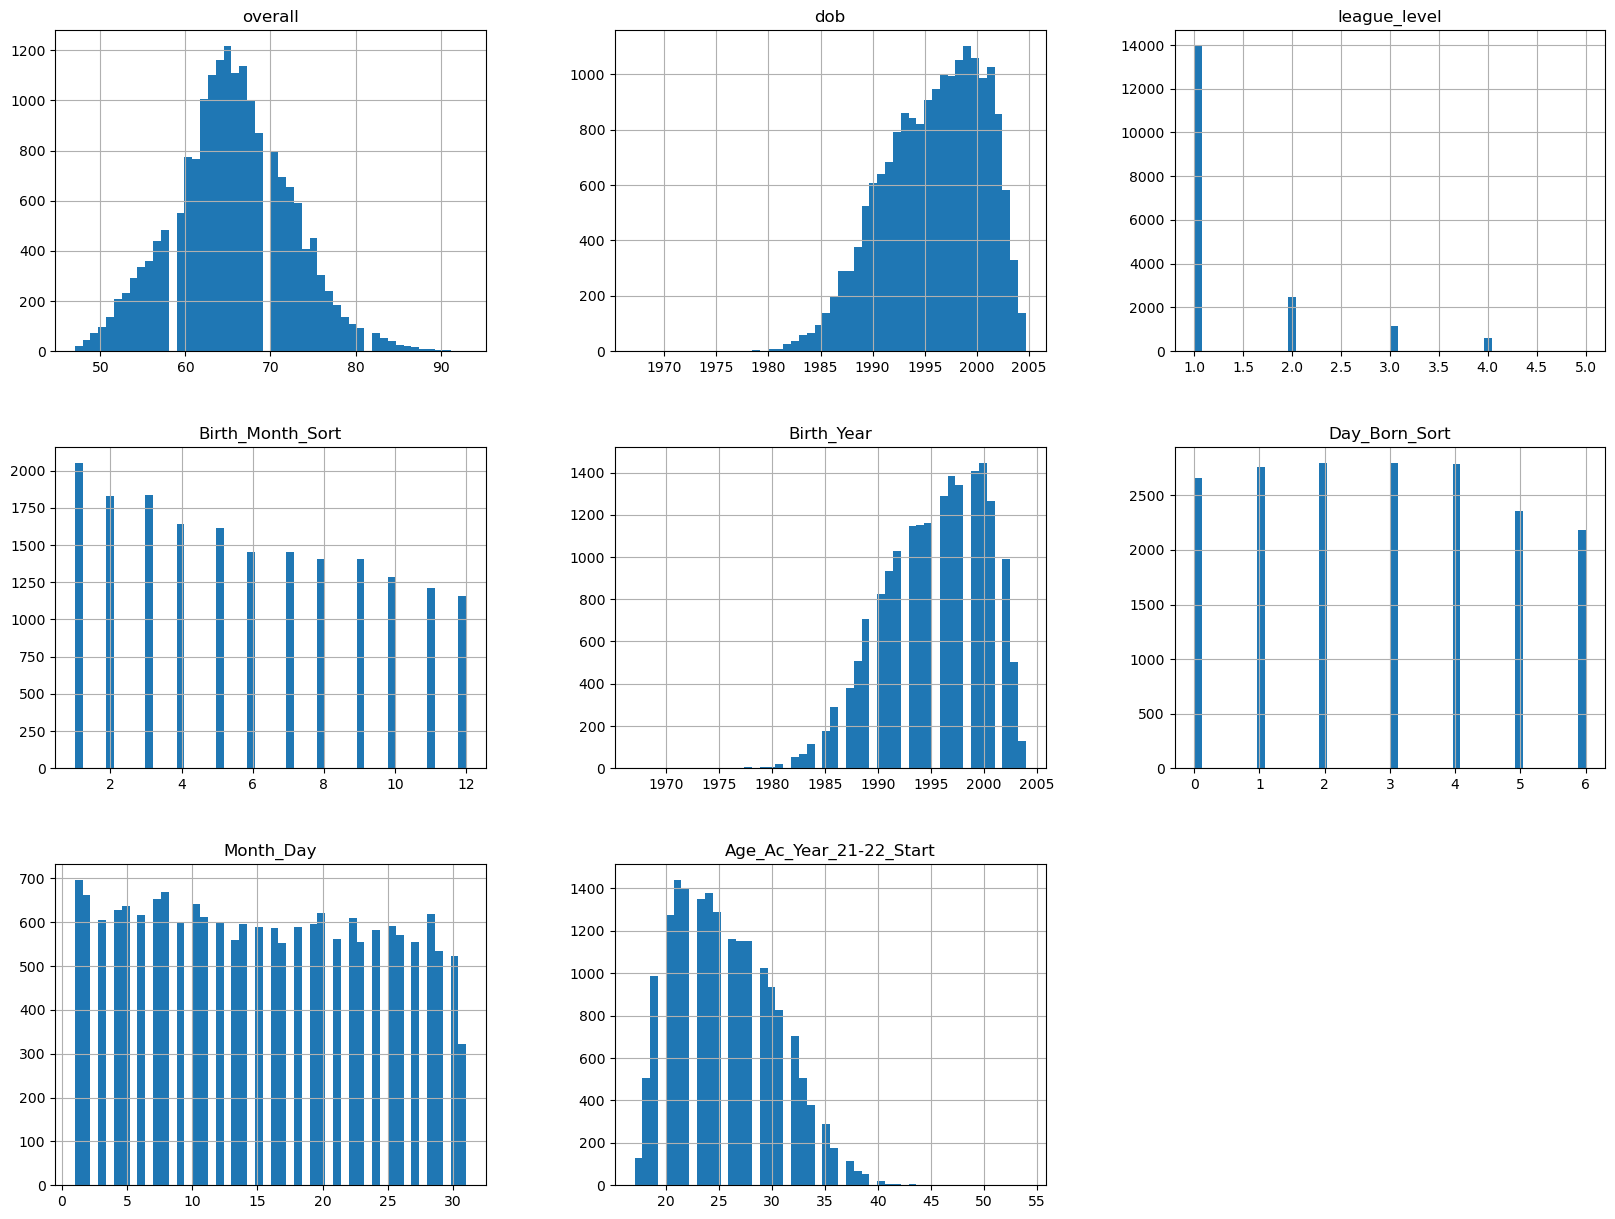

In [44]:
# Check out the distribution of the numerical variables 
df.hist(bins = 50, figsize = (20,15))
plt.show()

The weird spikes in the ages and birth year has gone now, although replaced with weird gaps...

I'm putting both anomolies down to the way the different graphs have binned the numbers and there isn't anything untoward with the underlying data

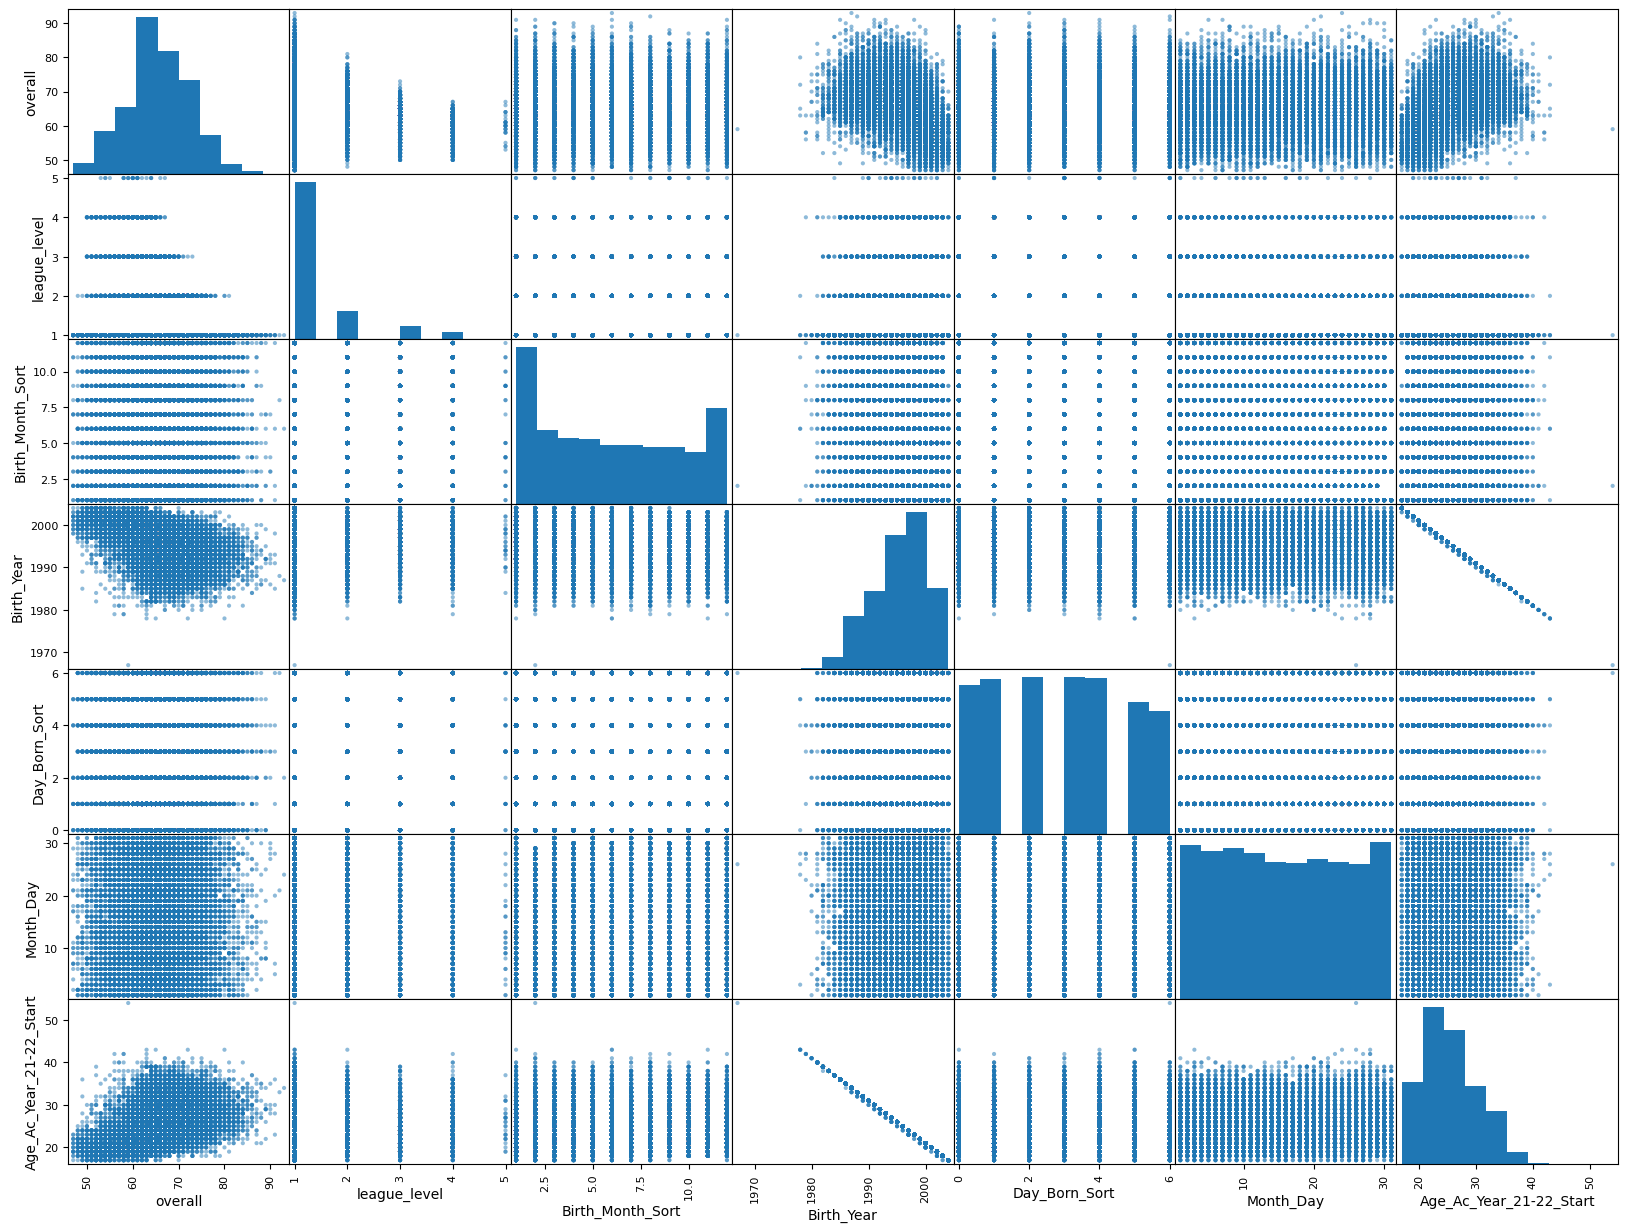

In [46]:
# Check out the distribution of the variables and the scatterplots using a single line of code
pd.plotting.scatter_matrix(df, figsize = (20,15))
# scatter_matrix(df, figsize = (20,15))
plt.show()

These scatterplots aren't really telling us much given the data that we've got.

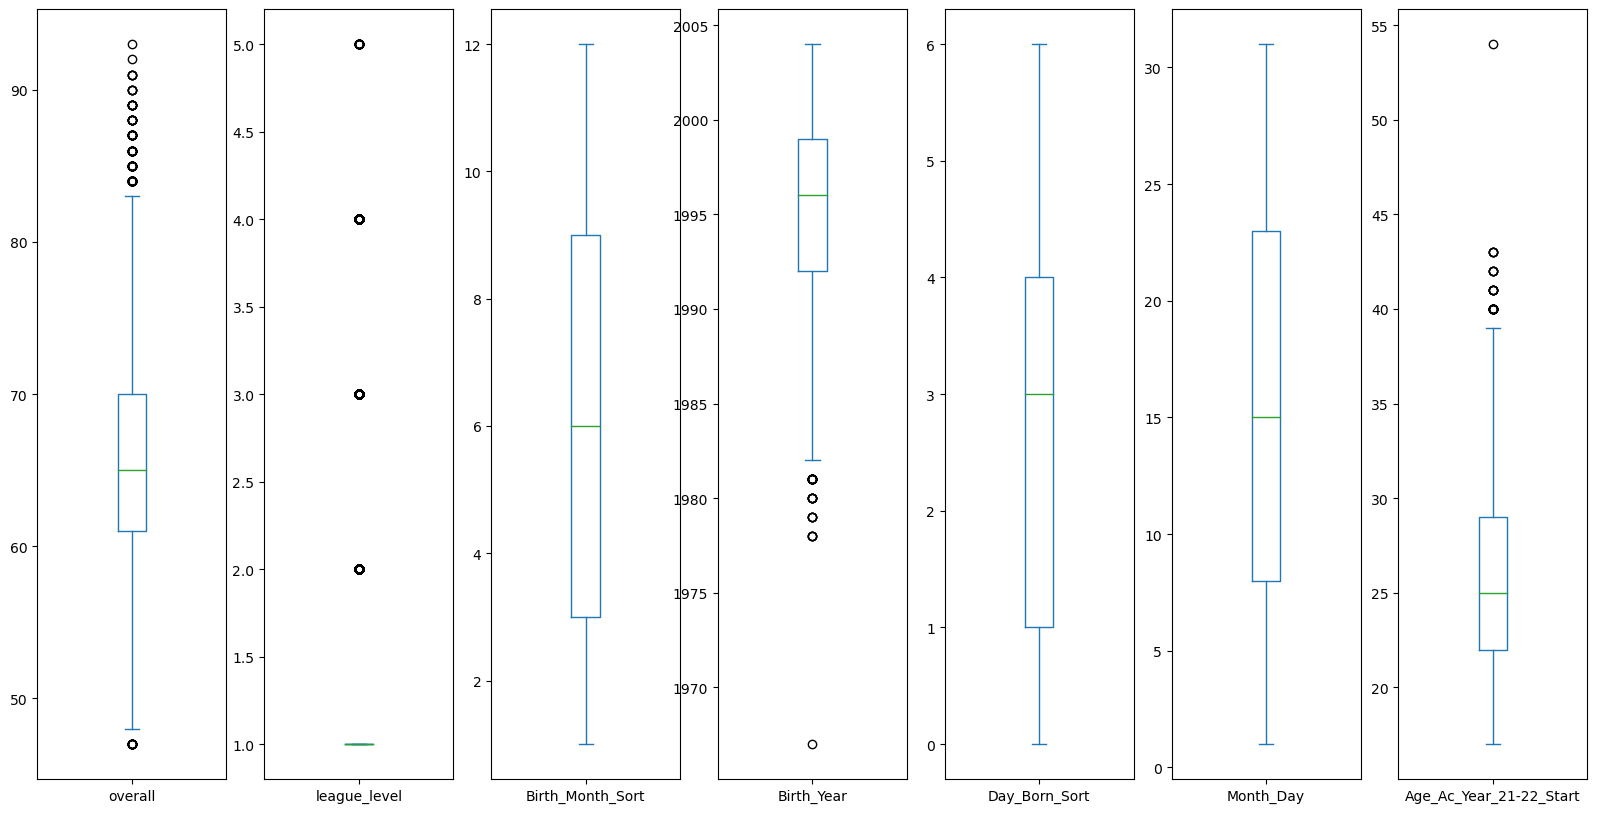

In [48]:
# Plot all the numerical variables using boxplots, use subplots = true and figsize = (20,15)
df.plot(kind = "box", figsize = (20,10), subplots = True)
plt.show()

Boxplots work well when trying to see outliers, there's a few in the age (and correspondingly Birth_Year) could be a bit more colourful too, but all I'm doing at the moment is playing

Let's start getting a bit more involved with the graphing

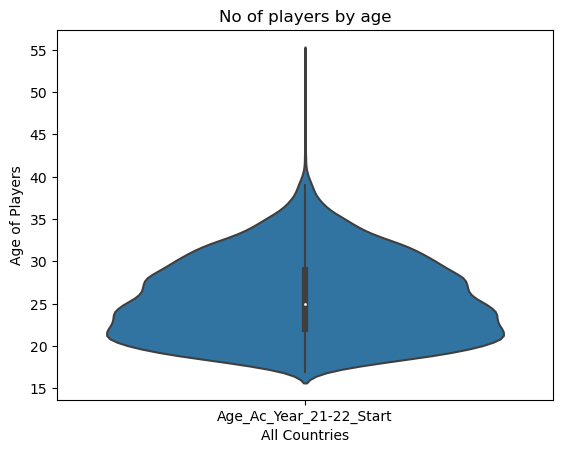

In [50]:
# Use seaborn for a violinplot
# Pass through the dataset and the columns to look at
sns.violinplot(data = df[["Age_Ac_Year_21-22_Start"]]) 

# add the title
plt.title("No of players by age")

# label the y axis
plt.ylabel("Age of Players")

# and the x axis
plt.xlabel("All Countries")

# show the graph
plt.show()

Nice, shows the age distribution well

Try another

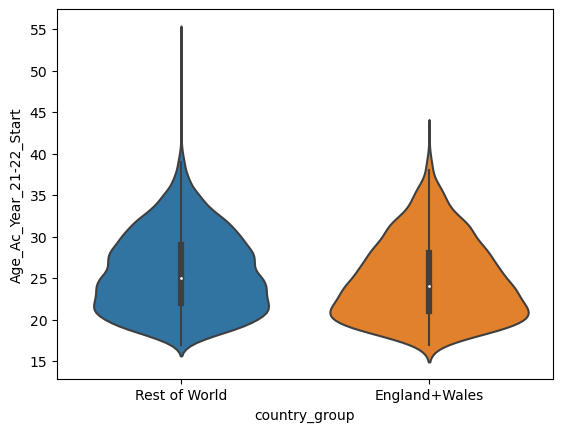

In [52]:
sns.violinplot(x='country_group', y='Age_Ac_Year_21-22_Start', data=df)

# show it
plt.show()

Not so easy to see the outliers

Now lets just boxplot them

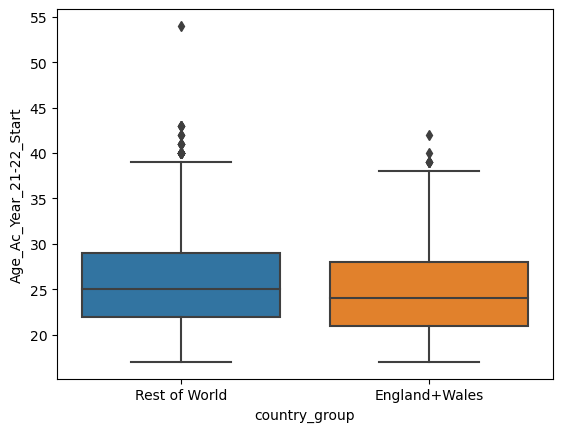

In [54]:
sns.boxplot(x='country_group', y='Age_Ac_Year_21-22_Start', data=df)

# show it
plt.show()

Now to do a countplot of the ages

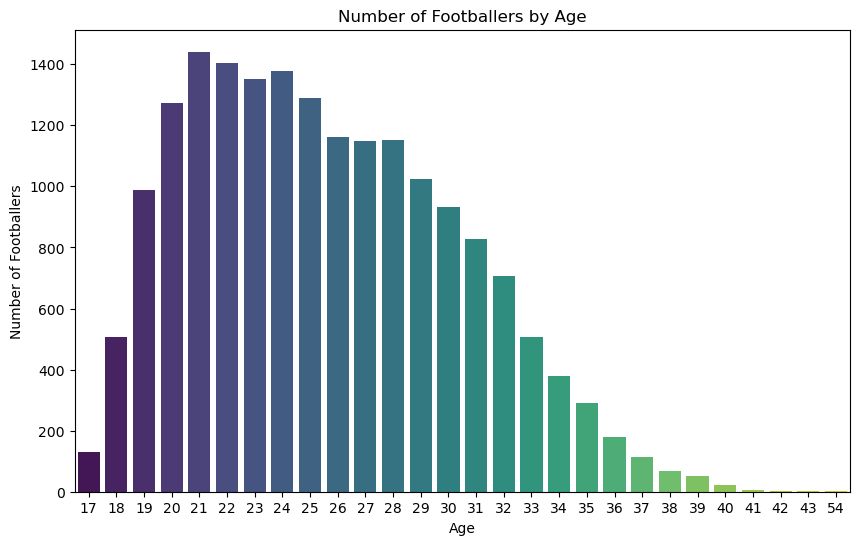

In [56]:
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Ac_Year_21-22_Start', data=df, palette='viridis')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Footballers')
plt.title('Number of Footballers by Age')

# Show the plot
plt.show()

Pretty, but not accurate as it's not got the ages between 43 and 54 where there are no footballers, let's go at it again

In [58]:
# Ensure all ages are shown even if there are no players of a certain age by creating a table with all possible ages
all_ages = pd.DataFrame({'Age_Ac_Year_21-22_Start': range(df['Age_Ac_Year_21-22_Start'].min(), df['Age_Ac_Year_21-22_Start'].max() + 1)})

print(all_ages)

    Age_Ac_Year_21-22_Start
0                        17
1                        18
2                        19
3                        20
4                        21
5                        22
6                        23
7                        24
8                        25
9                        26
10                       27
11                       28
12                       29
13                       30
14                       31
15                       32
16                       33
17                       34
18                       35
19                       36
20                       37
21                       38
22                       39
23                       40
24                       41
25                       42
26                       43
27                       44
28                       45
29                       46
30                       47
31                       48
32                       49
33                       50
34                  

In [59]:
# now calculate the no of players for each age
age_counts = df['Age_Ac_Year_21-22_Start'].value_counts().reset_index()

age_counts = pd.DataFrame(age_counts)

age_counts.head()

Age_Ac_Year_21-22_Start  count
0                       21   1441
1                       22   1403
2                       24   1378
3                       23   1352
4                       25   1289

In [60]:
# now merge age counts and all ages together ensuring all all_ages have a row
age_counts = pd.merge(all_ages, age_counts, on='Age_Ac_Year_21-22_Start', how='left').fillna(0)

print(age_counts)

    Age_Ac_Year_21-22_Start   count
0                        17   131.0
1                        18   507.0
2                        19   989.0
3                        20  1273.0
4                        21  1441.0
5                        22  1403.0
6                        23  1352.0
7                        24  1378.0
8                        25  1289.0
9                        26  1162.0
10                       27  1150.0
11                       28  1153.0
12                       29  1024.0
13                       30   933.0
14                       31   827.0
15                       32   706.0
16                       33   508.0
17                       34   378.0
18                       35   289.0
19                       36   178.0
20                       37   115.0
21                       38    68.0
22                       39    51.0
23                       40    22.0
24                       41     6.0
25                       42     4.0
26                       43 

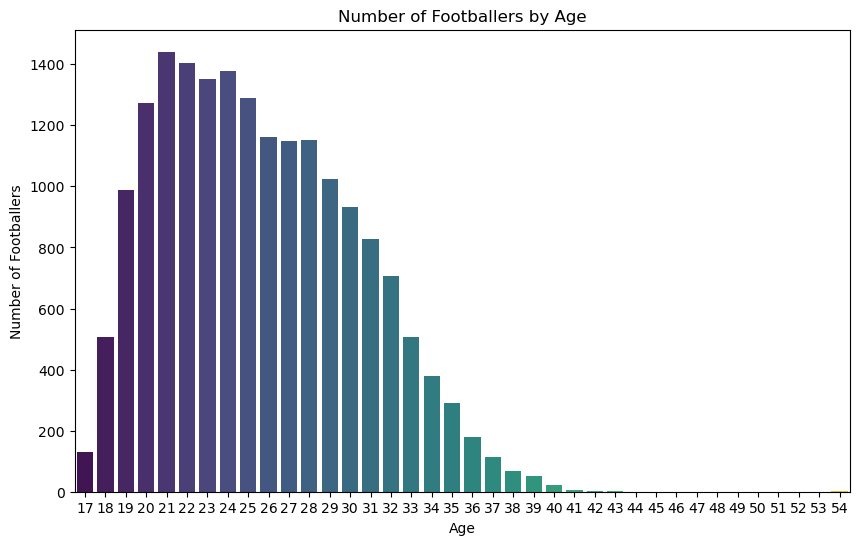

In [61]:
# and now create a barchart which will include all ages
plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Ac_Year_21-22_Start', y='count', data=age_counts, palette='viridis')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Number of Footballers')
plt.title('Number of Footballers by Age')

# Show the plot
plt.show()

Ok, so now we can see that there is that tail on the age of the footballers going up to 54, let's see who that is

In [63]:
df[df['Age_Ac_Year_21-22_Start'] == 54]

long_name  overall        dob    club_name  \
sofifa_id                                              
254704        三浦 知良       59 1967-02-26  Yokohama FC   

                             league_name  league_level nationality_name  \
sofifa_id                                                                 
254704     Japanese J. League Division 1           1.0            Japan   

          Birth_Month  Birth_Month_Sort  Birth_Year Day_Born  Day_Born_Sort  \
sofifa_id                                                                     
254704       February                 2        1967   Sunday              6   

           Month_Day  Age_Ac_Year_21-22_Start  country_group  
sofifa_id                                                     
254704            26                       54  Rest of World

Ok, let's try translating that...

[Kazuyoshi Miura](https://www.bing.com/search?q=%E4%B8%89%E6%B5%A6+%E7%9F%A5%E8%89%AF&form=ANNH01&refig=b343da05e9b140f9ba8e04ce9f666fca&pc=U531)

and he's still [playing](https://en.wikipedia.org/wiki/Kazuyoshi_Miura) ! 

Brilliant - looks like the data is good to this point, however, those outliers...


The lower number of older players means that we may not have a representative sample of players born in those years. Perhaps through some quirk of some kind, players born in the spring months are more likely to have longer careers than those born in the months of autumn. Therefore I reckon it would be better to remove the ages with a low number of players from the birth month analysis.

The easiest one to see the outliers on though is the boxplot. 

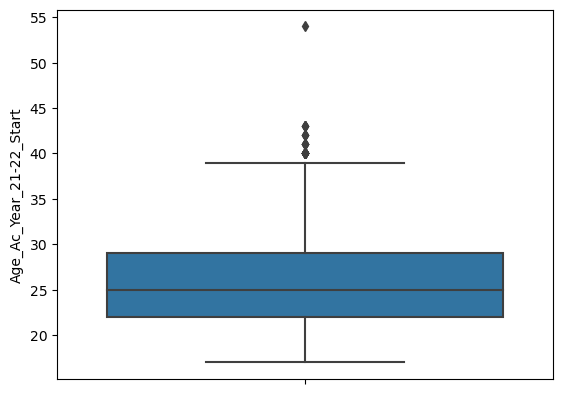

In [66]:
sns.boxplot(y='Age_Ac_Year_21-22_Start', data=df)

# show it
plt.show()

If we go with the interquartile range I think we'll be losing too much data, but filtering out the oldest and youngest 5% looks as if it will still leave plenty

In [68]:
# Calculate the 5th and 95th percentiles
lower_bound = df['Age_Ac_Year_21-22_Start'].quantile(0.05)
upper_bound = df['Age_Ac_Year_21-22_Start'].quantile(0.95)

print(lower_bound)
print(upper_bound)

19.0
34.0


ok, now to filter out anyone that falls outside that age range

In [70]:
# Filter the dataframe to remove the youngest 5% and the oldest 5%
df = df[(df['Age_Ac_Year_21-22_Start'] >= lower_bound) & (df['Age_Ac_Year_21-22_Start'] <= upper_bound)]

df.describe().round(0)

overall                            dob  league_level  Birth_Month_Sort  \
count  16966.0                          16966       16909.0           16966.0   
mean      66.0  1996-01-19 21:36:43.795826944           1.0               6.0   
min       47.0            1986-10-31 00:00:00           1.0               1.0   
25%       62.0            1992-11-03 00:00:00           1.0               3.0   
50%       66.0            1996-06-12 00:00:00           1.0               6.0   
75%       70.0            1999-07-08 00:00:00           1.0               9.0   
max       93.0            2002-12-30 00:00:00           5.0              12.0   
std        7.0                            NaN           1.0               3.0   

       Birth_Year  Day_Born_Sort  Month_Day  Age_Ac_Year_21-22_Start  
count     16966.0        16966.0    16966.0                  16966.0  
mean       1996.0            3.0       15.0                     25.0  
min        1986.0            0.0        1.0                     19.0  
25%        1992.0            1.0        8.0                     22.0  
50%        1996.0            3.0       15.0                     25.0  
75%        1999.0            4.0       23.0                     29.0  
max        2002.0            6.0       31.0                     34.0  
std           4.0            2.0        9.0                      4.0

In [71]:
df['country_group'].value_counts()

country_group
Rest of World    15261
England+Wales     1705
Name: count, dtype: int64

Ok, I think that's the data cleaned to where it needs to be

## Data Visualisation


Now let's get on and see what the number of footballer births per month look like. 

I'll need one for 'England+Wales' and one for 'Rest of World'

I want months on the x-axis and the count of footballers for each month on the y-axis

I'll add a variable here to allow for ordering the months

In [74]:
# Define the correct order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

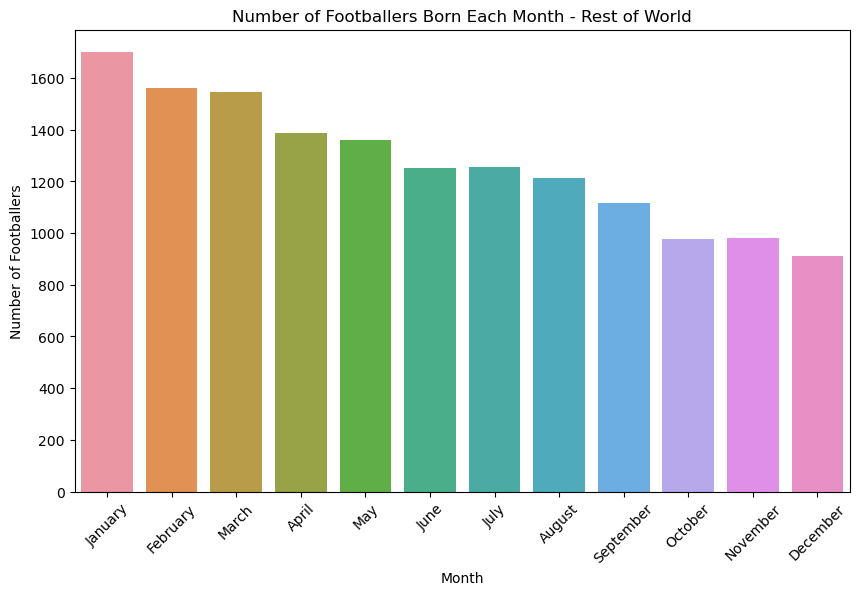

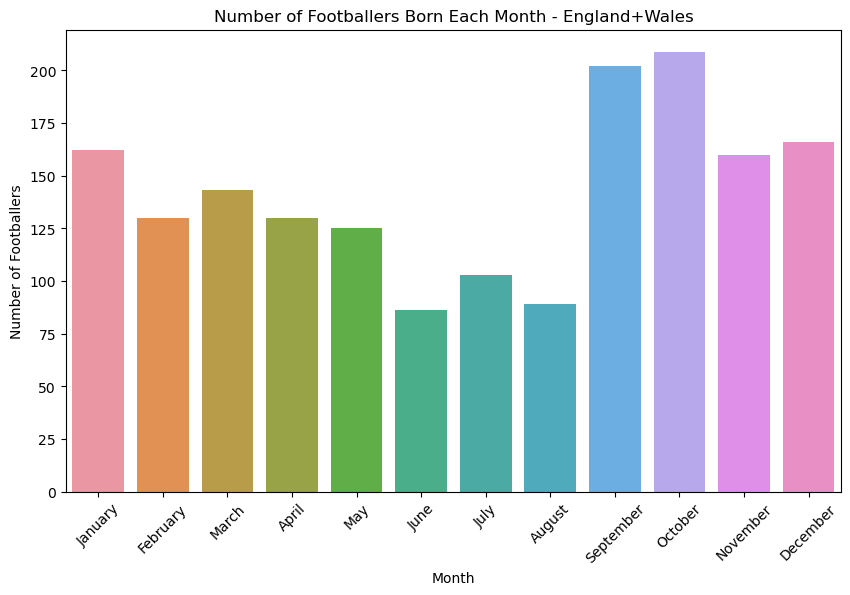

In [75]:
# Create a bar chart for each country group
for country_group in df['country_group'].unique():
    # Filter the dataframe for the current country group
    df_group = df[df['country_group'] == country_group]
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))

    # a countplot automatically counts the records for each value - means that I don't need to aggregate the data beforehand
    sns.countplot(data=df_group, x='Birth_Month', order=month_order)
    plt.title(f'Number of Footballers Born Each Month - {country_group}')
    plt.xlabel('Month')
    plt.ylabel('Number of Footballers')
    plt.xticks(rotation=45)


Interesting...

Now to add the line for the even distribution, for what we could expect if the births were evenly distributed throughout the year

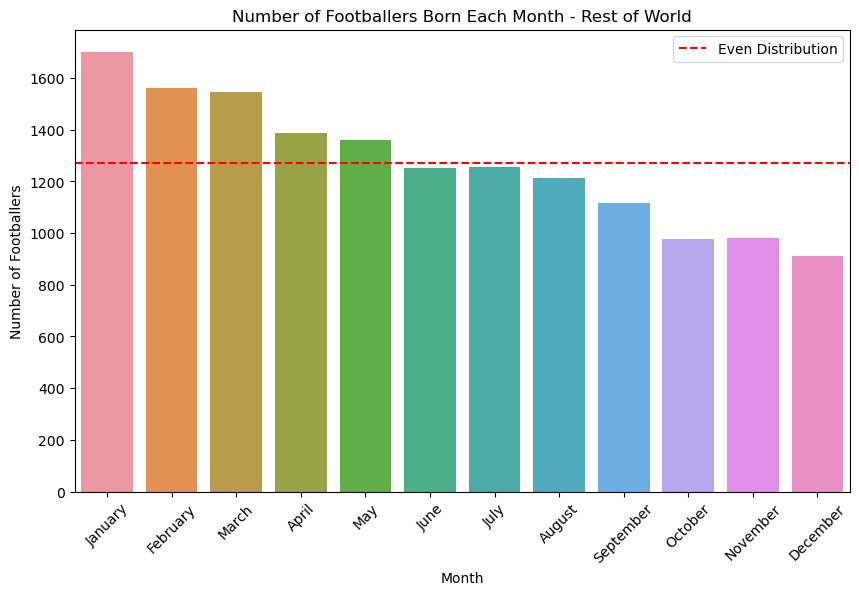

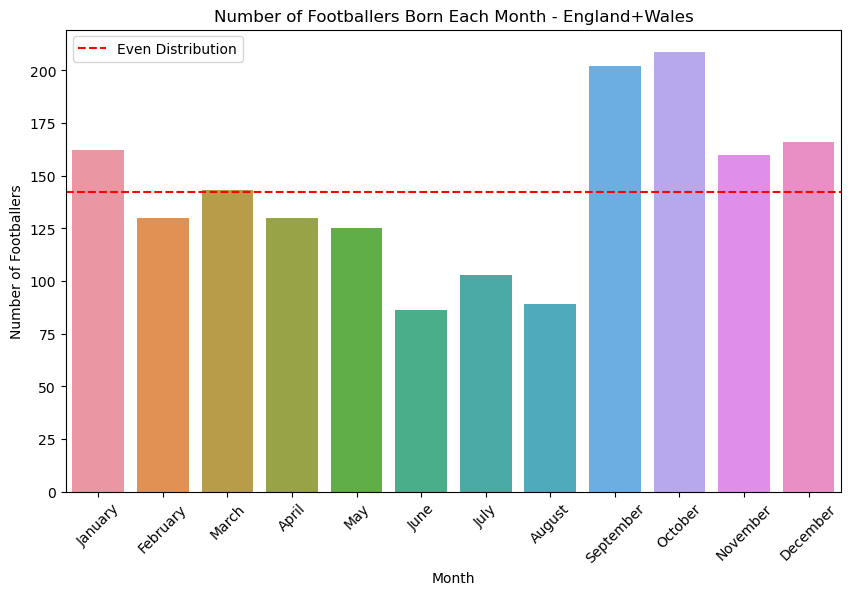

In [77]:
# Create countplots for each country group
for country_group in df['country_group'].unique():
    # Filter the dataframe for the current country group
    df_group = df[df['country_group'] == country_group]

    # Calculate the even distribution line
    total_footballers = len(df_group)
    even_distribution = total_footballers / 12
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))

    # a countplot automatically counts the records for each value - means that I don't need to aggregate the data beforehand
    sns.countplot(data=df_group, x='Birth_Month', order=month_order)
    plt.axhline(y=even_distribution, color='red', linestyle='--', label='Even Distribution')
    plt.legend()
    plt.title(f'Number of Footballers Born Each Month - {country_group}')
    plt.xlabel('Month')
    plt.ylabel('Number of Footballers')
    plt.xticks(rotation=45)

This is coming along alright. 

It's showing that in the rest of the world there are more footballers with their birthdays in the 1st quarter of the year, with each quarter decreasing from there. This could be indicative of most of the rest of the world using the calendar year for their youth footballing age groups and/or academic years.

For England & Wales the story is different, here the peak of the numbers is more closely following the academic year, which starts in September.

Let's try to get some numbers on here.

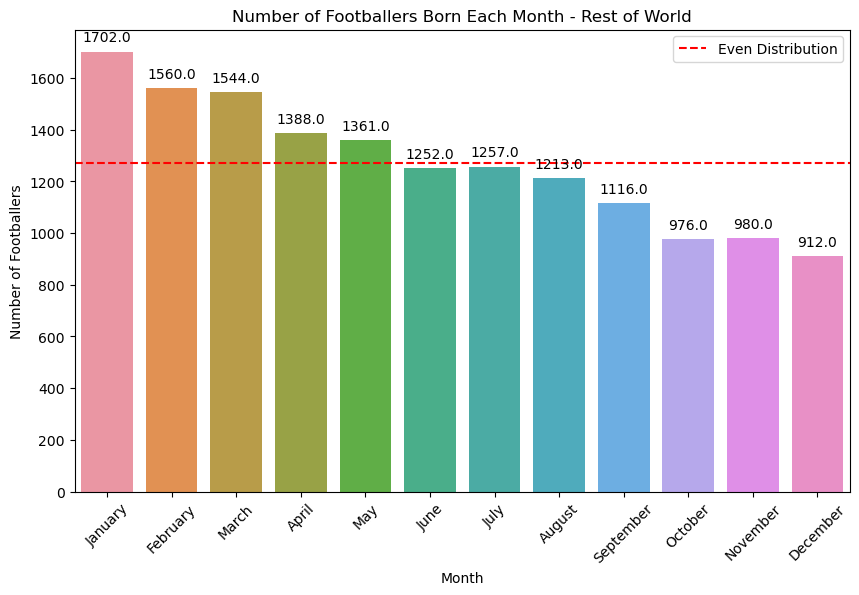

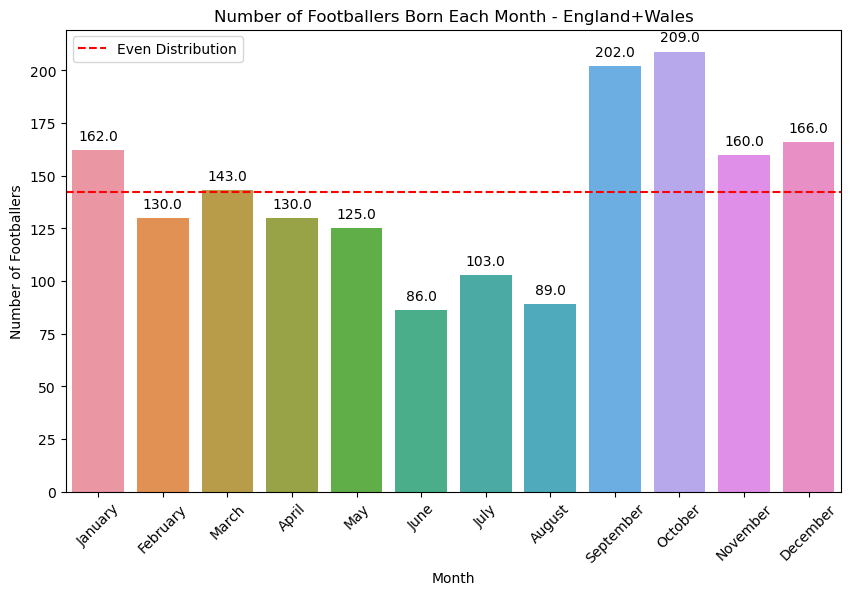

In [79]:
# Function to add values on top of bars
# keeping it seperate like this so I only have to fiddle with one bit of code as I experiment my way through
def add_values_on_bars(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}',
                    (p.get_x() + p.get_width() / 2.,
                     p.get_height()),
                    ha='center',
                    va='center',
                    xytext=(0, 10),
                    textcoords='offset points')

# Create countplots for each country group
for country_group in df['country_group'].unique():
    # Filter the dataframe for the current country group
    df_group = df[df['country_group'] == country_group]

    # Calculate the even distribution line
    total_footballers = len(df_group)
    even_distribution = total_footballers / 12
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))

    # a countplot automatically counts the records for each value - means that I don't need to aggregate the data beforehand
    # set it to be ax which will the object to pass to the add_values function up above
    ax = sns.countplot(data=df_group, x='Birth_Month', order=month_order)
    
    add_values_on_bars(ax)
    plt.axhline(y=even_distribution, color='red', linestyle='--', label='Even Distribution')
    plt.legend()
    plt.title(f'Number of Footballers Born Each Month - {country_group}')
    plt.xlabel('Month')
    plt.ylabel('Number of Footballers')
    plt.xticks(rotation=45)



This is close-ish to what I want. I want the values to be at inside the bottom of the bar and for them to be integers, with a comma for the thousands.

There's much more commenting added to the code now. Walking through a graph and knowing exactly which bits of code need to be tweaked to change which bit of the visual is not at all intuitive.

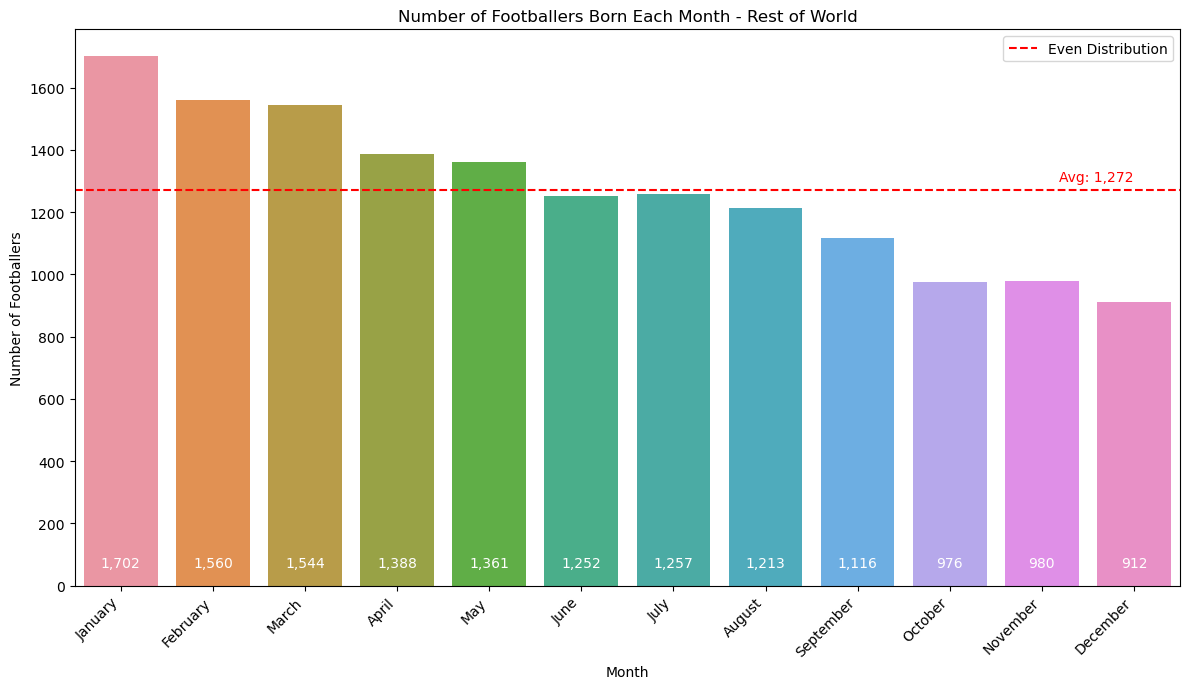

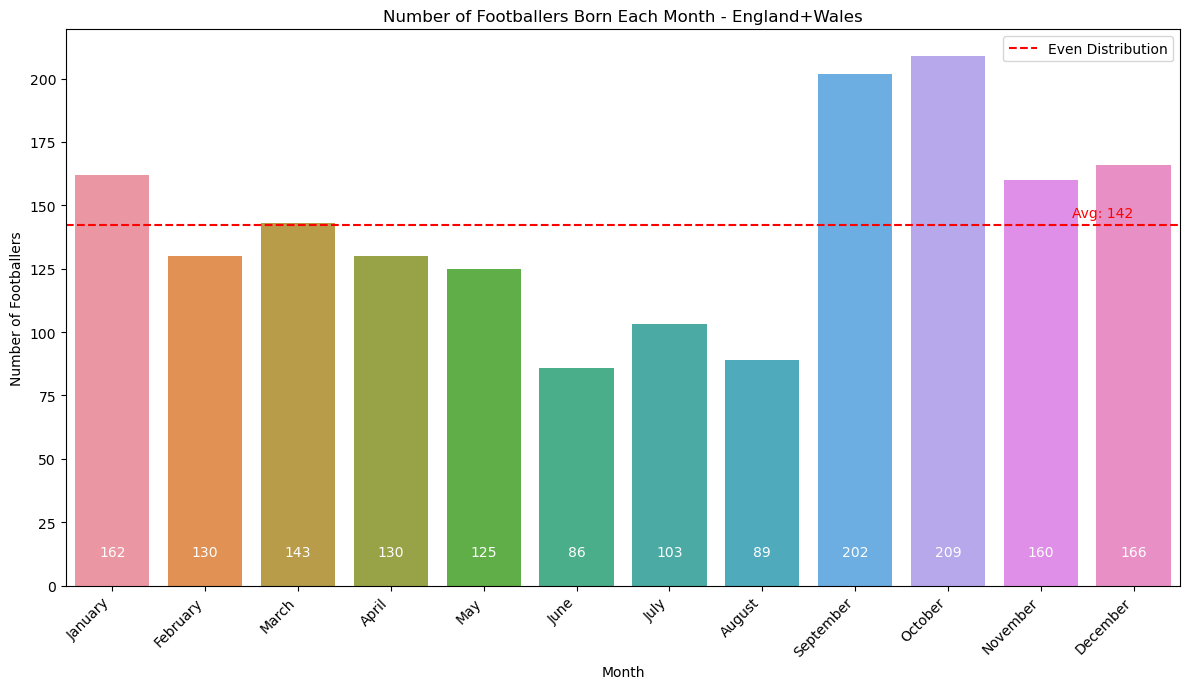

In [81]:
# --- Revised Function ---
# Function to add formatted values inside the bottom of the bars
def add_values_inside_bars(ax, bar_color='white', y_offset_points=5):
    """
    Adds formatted data labels inside the bottom of bars on a matplotlib Axes object.

    Args:
        ax: The matplotlib Axes object containing the bar chart.
        bar_color (str): The color for the annotation text. Default is 'white'.
        y_offset_points (int): Vertical offset in points from the bottom edge. Default is 5.
    """
    for p in ax.patches:
        # Get the height (value) of the bar
        height = p.get_height()

        # Format the value:
        # : ,   -> Use comma as a thousands separator
        # : .0f -> Format as a fixed-point number with zero decimal places (integer)
        formatted_value = f'{height:,.0f}'

        # Place the annotation
        ax.annotate(
            formatted_value,
            (p.get_x() + p.get_width() / 2., y_offset_points), # X: Center of the bar, Y: Fixed offset from bottom
            ha='center',          # Horizontal alignment: center
            va='bottom',          # Vertical alignment: bottom of the text aligns with y_offset_points
            xytext=(0, 10),
            textcoords='offset points', # Use offset points for y positioning relative to bottom
            color=bar_color       # Set text color (adjust if needed for bar colors)
        )

# --- Plotting Loop ---


# Create countplots for each country group
for country_group in df['country_group'].unique():
    # Filter the dataframe for the current country group
    df_group = df[df['country_group'] == country_group]

    # Calculate the even distribution line
    total_footballers = len(df_group)
    even_distribution = total_footballers / 12.0

    # Create the bar chart
    plt.figure(figsize=(12, 7)) # Slightly wider figure for labels

    # a countplot automatically counts the records for each value
    ax = sns.countplot(data=df_group, x='Birth_Month', order=month_order # Use the defined month order
        # You might want to add a 'palette' argument for better bar colors
        # e.g., palette='viridis'
    )

    # --- Call the revised annotation function ---
    # Pass 'black' or another contrasting color if your bars are very light
    add_values_inside_bars(ax, bar_color='white')

    # --- Add the horizontal line for even distribution ---
    ax.axhline(y=even_distribution, color='red', linestyle='--', label='Even Distribution')

    # --- Annotate the horizontal line ---
    # Format the even_distribution value similarly to the bar values
    formatted_even_dist = f'{even_distribution:,.0f}' # Use 1 decimal for average? Or .0f for int
    # Position the text:
    # x=11.5 -> Slightly past the last bar (December, index 11)
    # y=even_distribution + (ax.get_ylim()[1] * 0.01) -> Slightly above the line
    # Use ax.text for annotations not tied to specific plot elements like bars
    ax.text(
        11, # X position (adjust as needed, near the right edge)
        even_distribution + (ax.get_ylim()[1] * 0.01), # Y position slightly above the line
        f'Avg: {formatted_even_dist}', # The text label including the formatted value
        color='red',        # Match line color
        ha='right',       # Horizontal alignment
        va='bottom'       # Vertical alignment
    )

    # --- Final plot setup ---
    ax.legend()
    ax.set_title(f'Number of Footballers Born Each Month - {country_group}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Footballers')
    plt.xticks(rotation=45, ha='right') # Rotate labels and align them to the right
    plt.tight_layout() # Adjust layout to prevent labels overlapping
    plt.show()

That's more acceptable. It would be nice to have the quarters colour-coordinated though. 

Calendar year quarters for 'Rest of World' and academic quarters for 'England+Wales'.

In [83]:
# set the variables

# --- Mappings for Quarters ---
# Standard Quarters (Jan start)
standard_quarters = {
    'January': 'Q1 (Jan-Mar)', 'February': 'Q1 (Jan-Mar)', 'March': 'Q1 (Jan-Mar)',
    'April': 'Q2 (Apr-Jun)', 'May': 'Q2 (Apr-Jun)', 'June': 'Q2 (Apr-Jun)',
    'July': 'Q3 (Jul-Sep)', 'August': 'Q3 (Jul-Sep)', 'September': 'Q3 (Jul-Sep)',
    'October': 'Q4 (Oct-Dec)', 'November': 'Q4 (Oct-Dec)', 'December': 'Q4 (Oct-Dec)'
}
standard_q_order = ['Q1 (Jan-Mar)', 'Q2 (Apr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dec)']

# England+Wales Quarters (Sep start)
england_wales_quarters = {
    'September': 'Q1 (Sep-Nov)', 'October': 'Q1 (Sep-Nov)', 'November': 'Q1 (Sep-Nov)',
    'December': 'Q2 (Dec-Feb)', 'January': 'Q2 (Dec-Feb)', 'February': 'Q2 (Dec-Feb)',
    'March': 'Q3 (Mar-May)', 'April': 'Q3 (Mar-May)', 'May': 'Q3 (Mar-May)',
    'June': 'Q4 (Jun-Aug)', 'July': 'Q4 (Jun-Aug)', 'August': 'Q4 (Jun-Aug)'
}
england_wales_q_order = ['Q1 (Sep-Nov)', 'Q2 (Dec-Feb)', 'Q3 (Mar-May)', 'Q4 (Jun-Aug)']

# --- Define a Colour Palette for the Quarters ---
quarter_palette = {
    # Standard
    'Q1 (Jan-Mar)': '#1f77b4', 'Q2 (Apr-Jun)': '#ff7f0e', 'Q3 (Jul-Sep)': '#2ca02c', 'Q4 (Oct-Dec)': '#d62728',
    # England+Wales (can reuse or use different shades if needed)
    'Q1 (Sep-Nov)': '#1f77b4', 'Q2 (Dec-Feb)': '#ff7f0e', 'Q3 (Mar-May)': '#2ca02c', 'Q4 (Jun-Aug)': '#d62728',
}


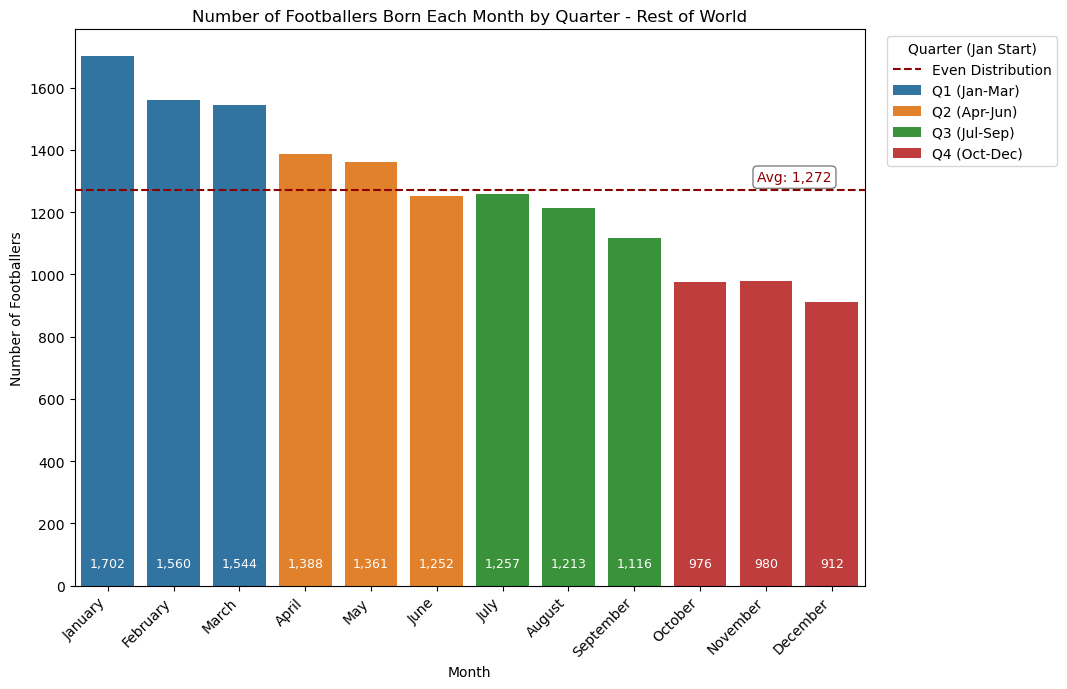

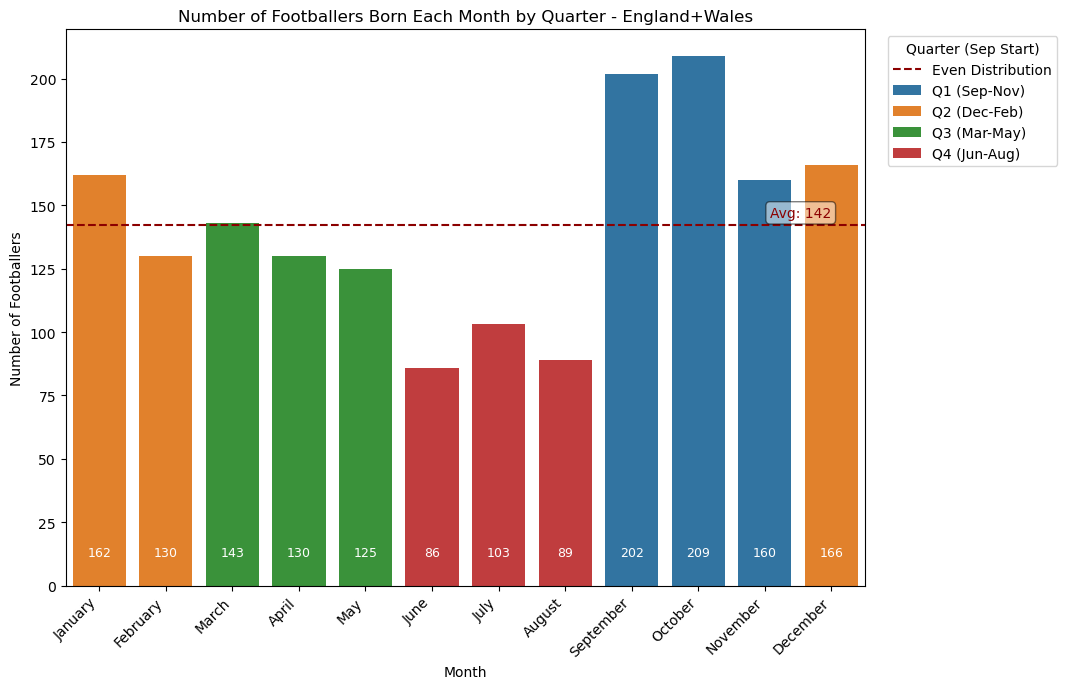

In [84]:
# --- Revised Function ---
# Function to add formatted values inside the bottom of the bars
# Changed default color to black for better contrast on various bar colors
def add_values_inside_bars(ax, bar_color='black', y_offset_points=5):
    """
    Adds formatted data labels inside the bottom of bars on a matplotlib Axes object.

    Args:
        ax: The matplotlib Axes object containing the bar chart.
        bar_color (str): The color for the annotation text. Default is 'black'.
        y_offset_points (int): Vertical offset in points from the bottom edge. Default is 5.
    """
    for p in ax.patches:
        height = p.get_height()
        # Don't add annotations for bars with zero height (common with hue)
        if height <= 0:
            continue

        # Format the value: comma thousands separator, zero decimal places
        formatted_value = f'{height:,.0f}'

        # Place the annotation
        ax.annotate(
            formatted_value,
            (p.get_x() + p.get_width() / 2., y_offset_points), # X: Center of the bar, Y: Fixed offset from bottom
            ha='center',          # Horizontal alignment: center
            va='bottom',          # Vertical alignment: bottom of the text aligns with y_offset_points
            xytext=(0, 10),
            textcoords='offset points', # Use offset points for y positioning relative to bottom
            color=bar_color,       # Set text color (adjust if needed for bar colors)
            fontsize=9 # Adjust fontsize if needed
        )

# --- Plotting Loop ---

# Create countplots for each country group
for country_group in df['country_group'].unique():
    # Filter the dataframe for the current country group
    df_group = df[df['country_group'] == country_group].copy() # Use .copy() to avoid SettingWithCopyWarning

    # --- Determine Quarter Mapping based on country_group ---
    if country_group == 'England+Wales':
        quarter_map = england_wales_quarters
        hue_order = england_wales_q_order
        quarter_col_name = 'Quarter (Sep Start)'
    else: # Default to standard quarters for 'Rest of World' or any other group
        quarter_map = standard_quarters
        hue_order = standard_q_order
        quarter_col_name = 'Quarter (Jan Start)'

    # --- Add the 'Quarter' column to the filtered dataframe ---
    df_group[quarter_col_name] = df_group['Birth_Month'].map(quarter_map)

    # Calculate the even distribution line
    total_footballers = len(df_group)
    even_distribution = total_footballers / 12.0

    # Create the bar chart
    plt.figure(figsize=(12, 7)) # Wider figure for legend and labels

    # Create the countplot using hue for the calculated Quarter column
    ax = sns.countplot(
        data=df_group,
        x='Birth_Month',
        order=month_order,
        hue=quarter_col_name, # Use the new column for coloring
        hue_order=hue_order,  # Ensure consistent legend order
        palette=quarter_palette, # Use the defined color palette
        dodge=False # Set dodge=False if you want stacked bars instead of side-by-side 
    )

    # --- Call the annotation function ---
    add_values_inside_bars(ax, bar_color='white')

    # --- Add the horizontal line for even distribution ---
    ax.axhline(y=even_distribution, color='darkred', linestyle='--', label='Even Distribution') # Darker red

    # --- Annotate the horizontal line ---
    formatted_even_dist = f'{even_distribution:,.0f}' # Format with 1 decimal place
    ax.text(
        11, # Adjust X position slightly to avoid overlap with Dec bar/label
        even_distribution + (ax.get_ylim()[1] * 0.01),
        f'Avg: {formatted_even_dist}',
        color='darkred',
        ha='right',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.5, pad=0.2, boxstyle='round,pad=0.3') # Add background box
    )

    # --- Final plot setup ---
    # Modify legend title - Get the hue column name dynamically
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles, labels=labels, title=quarter_col_name, bbox_to_anchor=(1.02, 1), loc='upper left') # Move legend outside

    ax.set_title(f'Number of Footballers Born Each Month by Quarter - {country_group}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Footballers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout(rect=[0, 0, 0.9, 1]) # Adjust layout to make space for legend outside
    plt.show()

ok, that's good enough. 

If I wanted to spend more time on it I'd be getting rid of borders and maybe some of the tick marks and just generally tidying it up a bit - the ink to info ratio. 

I might come back to this, see if I can dig out my old bit of code for setting up the default look of a graph from some of my old work. 

As it is, it's time to move on and get to some new analysis...

## Testing for Statistical Significance

So from the visuals alone it all looks pretty clear that there is a significant difference between the months and that when comparing England+Wales to the rest of the world the significance occurs in the first months of the academic year whereas for the rest of the world it's in the first months of the calendar year.

Now to see if those diffeences are statistically significant...

A way to do this is using the Chi-Squared (χ²) Goodness-of-Fit test.

Here's how it works:

1. The Concept

Null Hypothesis (H₀): The births of footballers are uniformly distributed across all 12 months. Any observed variation is just random chance.

Alternative Hypothesis (H₁): The births of footballers are not uniformly distributed across the 12 months. The observed pattern is statistically significant.

The Test: It compares observed counts for each month to the expected counts (what would be expected if the null hypothesis were true). If the difference between observed and expected is large enough, we reject the null hypothesis.

2. Calculating Expected Counts

Under the null hypothesis (uniform or even distribution), the expected number of births in each month is simply the total number of footballers in the group divided by 12.

Expected Count per Month = Total Footballers / 12

We can perform this test easily in Python using the scipy.stats.chisquare function.

We'll need to do this for each country_group, as the significance might differ between groups.

In [87]:
# import stats from scipy

from scipy import stats # <--- Import stats from scipy

In [88]:
# set a function to be called multiple times

def chi_test(df_group, c_grp):
    print(f"\n--- Processing Group: {c_grp} ---")

    total_footballers = len(df_group)
    even_distribution = total_footballers / 12.0

    # --- Perform Chi-Squared Test ---
    print(f"Total footballers in group: {total_footballers}")
    print(f"Expected count per month (if uniform): {even_distribution:.0f}")

    # Get observed counts making sure they are in the correct month order
    observed_counts = df_group['Birth_Month'].value_counts().reindex(month_order, fill_value=0)

    print(observed_counts)

    # Check assumption: Expected frequency in each test should ideally be >= 5
    # prints a warning if it's below 5, as low expected counts can make the chi-squared test less accurate.
    if even_distribution < 5:
        print("Warning: Expected count per month is less than 5. Chi-squared test results may be less reliable.")

    # Perform the test
    # By default, stats.chisquare assumes expected frequencies are equal (uniform)
    chi2_stat, p_value = stats.chisquare(f_obs=observed_counts)

    print(f"Chi-Squared Statistic (χ²): {chi2_stat:.4f}")
    print(f"P-value: {p_value:.4f}")

    # Interpret the result
    if p_value < alpha:
        print(f"Result: Reject H₀ (p <= {alpha}). The distribution of births is significantly different from uniform.")
    else:
        print(f"Result: Fail to reject H₀ (p > {alpha}). There is not enough evidence to say the distribution differs significantly from uniform.")
    # --- End Chi-Squared Test ---


For the Chi-Squared function to work we pass through observed counts and expected counts

As we're going for uniform distribution we don't need to pass through the expected as it will work it out by default.
If we did want a different expected frequency it'd be `f_exp=ExpectedNumbersHere`

It will return the calculated Chi-Squared statistic (chi2_stat) and the p-value (p_value).
  
Interpret p_value:

The p-value represents the probability of observing the observed data (or data even more skewed) if the null hypothesis (uniform distribution) were true.

If p_value < alpha: The observed pattern is very unlikely under the uniform assumption. We reject the null hypothesis and conclude the distribution is significantly non-uniform.

If p_value >= alpha: The observed pattern is reasonably possible under the uniform assumption. We fail to reject the null hypothesis. There isn't enough statistical evidence to conclude the distribution is non-uniform.

In [90]:
# set our signignificance level - 0.05 is a standard threshold
alpha = 0.05 

# we want to run it for each testing group so will wrap it in a for loop
for country_group in df['country_group'].unique():
    chi_test(df[df['country_group'] == country_group], country_group)


--- Processing Group: Rest of World ---
Total footballers in group: 15261
Expected count per month (if uniform): 1272
Birth_Month
January      1702
February     1560
March        1544
April        1388
May          1361
June         1252
July         1257
August       1213
September    1116
October       976
November      980
December      912
Name: count, dtype: int64
Chi-Squared Statistic (χ²): 545.8040
P-value: 0.0000
Result: Reject H₀ (p <= 0.05). The distribution of births is significantly different from uniform.

--- Processing Group: England+Wales ---
Total footballers in group: 1705
Expected count per month (if uniform): 142
Birth_Month
January      162
February     130
March        143
April        130
May          125
June          86
July         103
August        89
September    202
October      209
November     160
December     166
Name: count, dtype: int64
Chi-Squared Statistic (χ²): 122.6950
P-value: 0.0000
Result: Reject H₀ (p <= 0.05). The distribution of births is si

So there we have it, in both cases the distribution of births is signifcant :)

We can also check the dataset as a whole

In [92]:
chi_test(df, "All")


--- Processing Group: All ---
Total footballers in group: 16966
Expected count per month (if uniform): 1414
Birth_Month
January      1864
February     1690
March        1687
April        1518
May          1486
June         1338
July         1360
August       1302
September    1318
October      1185
November     1140
December     1078
Name: count, dtype: int64
Chi-Squared Statistic (χ²): 452.7193
P-value: 0.0000
Result: Reject H₀ (p <= 0.05). The distribution of births is significantly different from uniform.


Unsurprisingly this gives the same result in terms of significance.

There's another tests we could run 

The G-Test

>Think of it like: Very similar to the Chi-Squared test, also used for categorical data to see if observed counts match expected counts. It's based on a different mathematical idea (likelihood ratios) but often gives similar results to the Chi-Squared test, especially with larger sample sizes.


>When to use it: Just like the Chi-Squared test, when you have categorical data and want to compare observed counts to expected counts or see if there's a relationship between categories. Some statisticians prefer it in certain situations, especially when dealing with more complex experimental designs or when you need to combine results from multiple tests.


>Why choose it over Chi-Squared sometimes? The G-Test has some mathematical properties that make it more suitable in certain advanced statistical situations, particularly when you're dealing with more complicated models. For most basic uses with categorical data, both tests will often lead to the same conclusion.


In [94]:
# set a function to be called multiple times

def other_tests(df_group, c_grp):
    print(f"\n--- Processing Group: {c_grp} ---")

    total_footballers = len(df_group)
    even_distribution = total_footballers / 12.0

    # --- Perform Chi-Squared Test ---
    print(f"Total footballers in group: {total_footballers}")
    print(f"Expected count per month (if uniform): {even_distribution:.0f}")

    # Get observed counts making sure they are in the correct month order
    observed_counts = df_group['Birth_Month'].value_counts().reindex(month_order, fill_value=0)

    print(observed_counts)
    
    # G-Test (Likelihood Ratio Test)
    g_stat = 2 * np.sum(observed_counts * np.log(observed_counts / even_distribution))
    g_p_value = 1 - stats.chi2.cdf(g_stat, df=11)
    print(f"G-Test: Statistic={g_stat:.6f}")
    print(f"P-Value={g_p_value:.6f}")

    # Interpret the result
    if g_p_value < alpha:
        print(f"Result: Reject H₀ (p <= {alpha}). The distribution of births is significantly different from uniform.")
    else:
        print(f"Result: Fail to reject H₀ (p > {alpha}). There is not enough evidence to say the distribution differs significantly from uniform.")

In [95]:
# we want to run it for each testing group so will wrap it in a for loop
for country_group in df['country_group'].unique():
    other_tests(df[df['country_group'] == country_group], country_group)


--- Processing Group: Rest of World ---
Total footballers in group: 15261
Expected count per month (if uniform): 1272
Birth_Month
January      1702
February     1560
March        1544
April        1388
May          1361
June         1252
July         1257
August       1213
September    1116
October       976
November      980
December      912
Name: count, dtype: int64
G-Test: Statistic=547.014662
P-Value=0.000000
Result: Reject H₀ (p <= 0.05). The distribution of births is significantly different from uniform.

--- Processing Group: England+Wales ---
Total footballers in group: 1705
Expected count per month (if uniform): 142
Birth_Month
January      162
February     130
March        143
April        130
May          125
June          86
July         103
August        89
September    202
October      209
November     160
December     166
Name: count, dtype: int64
G-Test: Statistic=123.330886
P-Value=0.000000
Result: Reject H₀ (p <= 0.05). The distribution of births is significantly di

In [96]:
other_tests(df, "All")


--- Processing Group: All ---
Total footballers in group: 16966
Expected count per month (if uniform): 1414
Birth_Month
January      1864
February     1690
March        1687
April        1518
May          1486
June         1338
July         1360
August       1302
September    1318
October      1185
November     1140
December     1078
Name: count, dtype: int64
G-Test: Statistic=446.661037
P-Value=0.000000
Result: Reject H₀ (p <= 0.05). The distribution of births is significantly different from uniform.
